<a href="https://colab.research.google.com/github/Shamymash/Shamy/blob/master/Forecasting_Stockes_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install einops --quiet
!pip install yfinance --quiet  # In case we want to compare with live data

# Clone the Time-Series-Library repo to get PatchTST model
!git clone https://github.com/thuml/Time-Series-Library.git
%cd Time-Series-Library

# Check files
!ls
!pip install reformer_pytorch

fatal: destination path 'Time-Series-Library' already exists and is not an empty directory.
/content/Time-Series-Library
CONTRIBUTING.md  Processed_DJI.csv	run.py
data_provider	 Processed_NASDAQ.csv	scripts
exp		 Processed_NYSE.csv	Time-Series-Library
layers		 Processed_RUSSELL.csv	tutorial
LICENSE		 Processed_SP.csv	utils
models		 README.md
pic		 requirements.txt


In [2]:
pip install --upgrade pip setuptools


In [3]:
pip install scikit-learn

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Processed_DJI.csv to Processed_DJI (1).csv
Saving Processed_NASDAQ.csv to Processed_NASDAQ (1).csv
Saving Processed_NYSE.csv to Processed_NYSE (1).csv
Saving Processed_RUSSELL.csv to Processed_RUSSELL (1).csv
Saving Processed_SP.csv to Processed_SP (1).csv


In [5]:
import pandas as pd

# Load S&P dataset
df = pd.read_csv("Processed_SP.csv")

# Display shape and first 5 rows
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (1984, 84)


,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,1115.099976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,1132.989990,0.921723,0.016043,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,1136.520020,-0.375903,0.003116,0.016043,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,1137.140015,0.996234,0.000546,0.003116,0.016043,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,1141.689941,0.059932,0.004001,0.000546,0.003116,0.016043,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Drop 'Date' and 'Name' columns and any rows with NaN values
df_clean = df.drop(columns=['Date', 'Name']).dropna()

# Normalize numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean)

# Convert to NumPy
import numpy as np
data = np.array(data_scaled)

print("Cleaned data shape:", data.shape)

Cleaned data shape: (1114, 82)


In [7]:
def create_sequences(data, input_len=96, output_len=24):
    X, Y = [], []
    for i in range(len(data) - input_len - output_len):
        x_seq = data[i:i+input_len]
        y_seq = data[i+input_len:i+input_len+output_len]
        X.append(x_seq)
        Y.append(y_seq)
    return np.array(X), np.array(Y)

# Create sequences
X, Y = create_sequences(data, input_len=96, output_len=24)

# Show shapes
print("X shape (inputs):", X.shape)
print("Y shape (targets):", Y.shape)


X shape (inputs): (994, 96, 82)
Y shape (targets): (994, 24, 82)



--- Processing dataset: Processed_SP.csv ---
Epoch 1/50, Training Loss: 0.0597
Epoch 2/50, Training Loss: 0.0495
Epoch 3/50, Training Loss: 0.0476
Epoch 4/50, Training Loss: 0.0476
Epoch 5/50, Training Loss: 0.0469
Epoch 6/50, Training Loss: 0.0469
Epoch 7/50, Training Loss: 0.0476
Epoch 8/50, Training Loss: 0.0448
Epoch 9/50, Training Loss: 0.0454
Epoch 10/50, Training Loss: 0.0459
Epoch 11/50, Training Loss: 0.0443
Epoch 12/50, Training Loss: 0.0441
Epoch 13/50, Training Loss: 0.0449
Epoch 14/50, Training Loss: 0.0436
Epoch 15/50, Training Loss: 0.0437
Epoch 16/50, Training Loss: 0.0424
Epoch 17/50, Training Loss: 0.0417
Epoch 18/50, Training Loss: 0.0408
Epoch 19/50, Training Loss: 0.0397
Epoch 20/50, Training Loss: 0.0386
Epoch 21/50, Training Loss: 0.0378
Epoch 22/50, Training Loss: 0.0362
Epoch 23/50, Training Loss: 0.0350
Epoch 24/50, Training Loss: 0.0332
Epoch 25/50, Training Loss: 0.0311
Epoch 26/50, Training Loss: 0.0288
Epoch 27/50, Training Loss: 0.0269
Epoch 28/50, Train

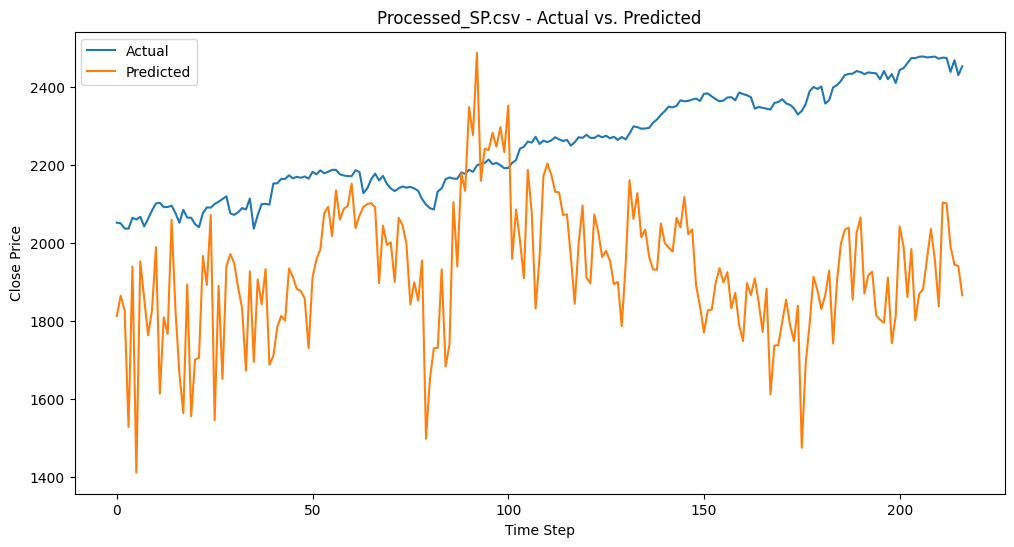

Model saved to model_Processed_SP.pth
✅ Finished processing dataset: Processed_SP.csv

--- Processing dataset: Processed_RUSSELL.csv ---
Epoch 1/50, Training Loss: 0.0481
Epoch 2/50, Training Loss: 0.0433
Epoch 3/50, Training Loss: 0.0420
Epoch 4/50, Training Loss: 0.0404
Epoch 5/50, Training Loss: 0.0420
Epoch 6/50, Training Loss: 0.0413
Epoch 7/50, Training Loss: 0.0405
Epoch 8/50, Training Loss: 0.0406
Epoch 9/50, Training Loss: 0.0398
Epoch 10/50, Training Loss: 0.0395
Epoch 11/50, Training Loss: 0.0387
Epoch 12/50, Training Loss: 0.0382
Epoch 13/50, Training Loss: 0.0383
Epoch 14/50, Training Loss: 0.0373
Epoch 15/50, Training Loss: 0.0376
Epoch 16/50, Training Loss: 0.0369
Epoch 17/50, Training Loss: 0.0365
Epoch 18/50, Training Loss: 0.0362
Epoch 19/50, Training Loss: 0.0334
Epoch 20/50, Training Loss: 0.0342
Epoch 21/50, Training Loss: 0.0316
Epoch 22/50, Training Loss: 0.0313
Epoch 23/50, Training Loss: 0.0291
Epoch 24/50, Training Loss: 0.0282
Epoch 25/50, Training Loss: 0.02

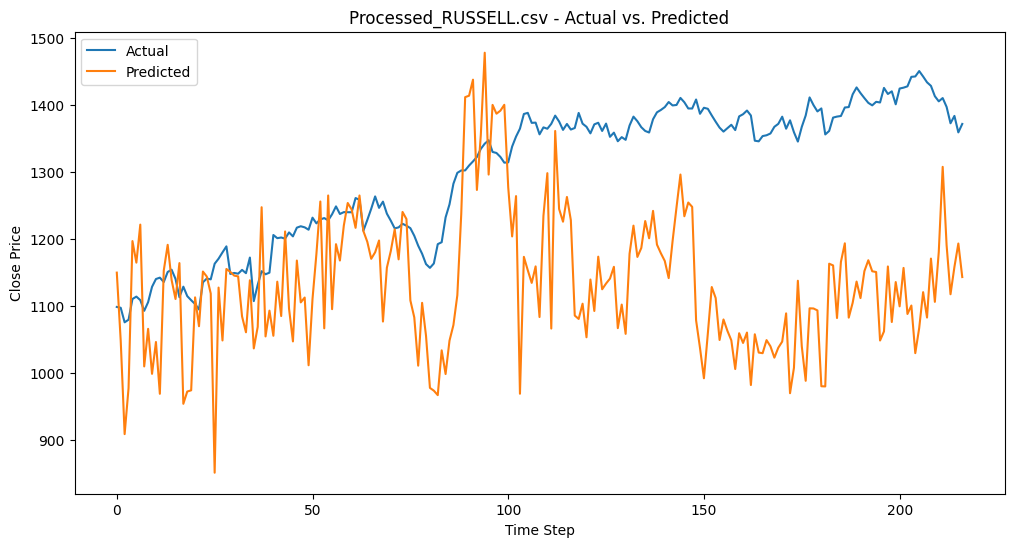

Model saved to model_Processed_RUSSELL.pth
✅ Finished processing dataset: Processed_RUSSELL.csv

--- Processing dataset: Processed_NYSE.csv ---
Epoch 1/50, Training Loss: 0.0506
Epoch 2/50, Training Loss: 0.0486
Epoch 3/50, Training Loss: 0.0493
Epoch 4/50, Training Loss: 0.0482
Epoch 5/50, Training Loss: 0.0475
Epoch 6/50, Training Loss: 0.0461
Epoch 7/50, Training Loss: 0.0458
Epoch 8/50, Training Loss: 0.0459
Epoch 9/50, Training Loss: 0.0444
Epoch 10/50, Training Loss: 0.0429
Epoch 11/50, Training Loss: 0.0432
Epoch 12/50, Training Loss: 0.0431
Epoch 13/50, Training Loss: 0.0424
Epoch 14/50, Training Loss: 0.0422
Epoch 15/50, Training Loss: 0.0425
Epoch 16/50, Training Loss: 0.0406
Epoch 17/50, Training Loss: 0.0409
Epoch 18/50, Training Loss: 0.0400
Epoch 19/50, Training Loss: 0.0381
Epoch 20/50, Training Loss: 0.0365
Epoch 21/50, Training Loss: 0.0362
Epoch 22/50, Training Loss: 0.0349
Epoch 23/50, Training Loss: 0.0332
Epoch 24/50, Training Loss: 0.0321
Epoch 25/50, Training Los

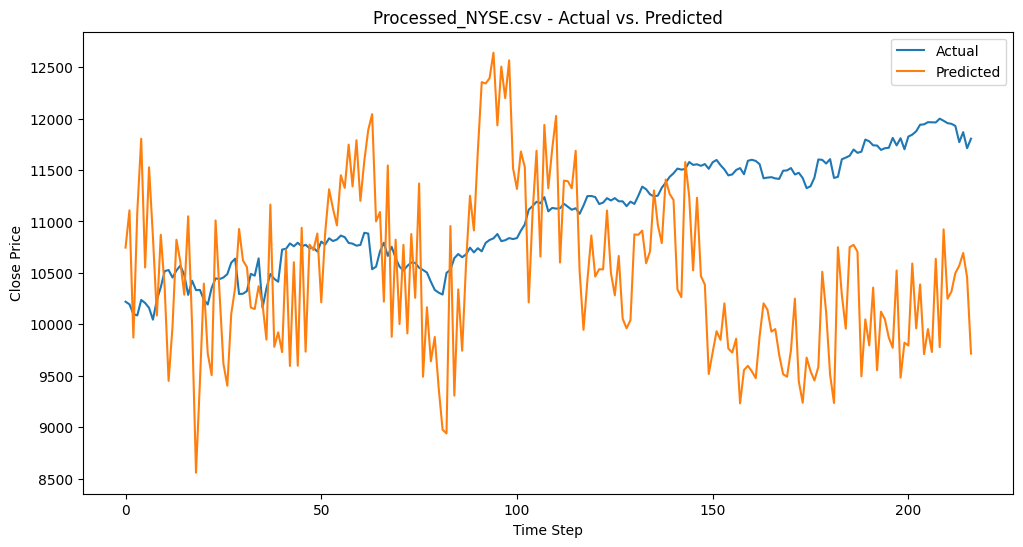

Model saved to model_Processed_NYSE.pth
✅ Finished processing dataset: Processed_NYSE.csv

--- Processing dataset: Processed_NASDAQ.csv ---
Epoch 1/50, Training Loss: 0.0660
Epoch 2/50, Training Loss: 0.0471
Epoch 3/50, Training Loss: 0.0432
Epoch 4/50, Training Loss: 0.0444
Epoch 5/50, Training Loss: 0.0434
Epoch 6/50, Training Loss: 0.0429
Epoch 7/50, Training Loss: 0.0421
Epoch 8/50, Training Loss: 0.0429
Epoch 9/50, Training Loss: 0.0431
Epoch 10/50, Training Loss: 0.0423
Epoch 11/50, Training Loss: 0.0424
Epoch 12/50, Training Loss: 0.0427
Epoch 13/50, Training Loss: 0.0403
Epoch 14/50, Training Loss: 0.0415
Epoch 15/50, Training Loss: 0.0400
Epoch 16/50, Training Loss: 0.0411
Epoch 17/50, Training Loss: 0.0400
Epoch 18/50, Training Loss: 0.0384
Epoch 19/50, Training Loss: 0.0385
Epoch 20/50, Training Loss: 0.0375
Epoch 21/50, Training Loss: 0.0366
Epoch 22/50, Training Loss: 0.0356
Epoch 23/50, Training Loss: 0.0350
Epoch 24/50, Training Loss: 0.0329
Epoch 25/50, Training Loss: 0

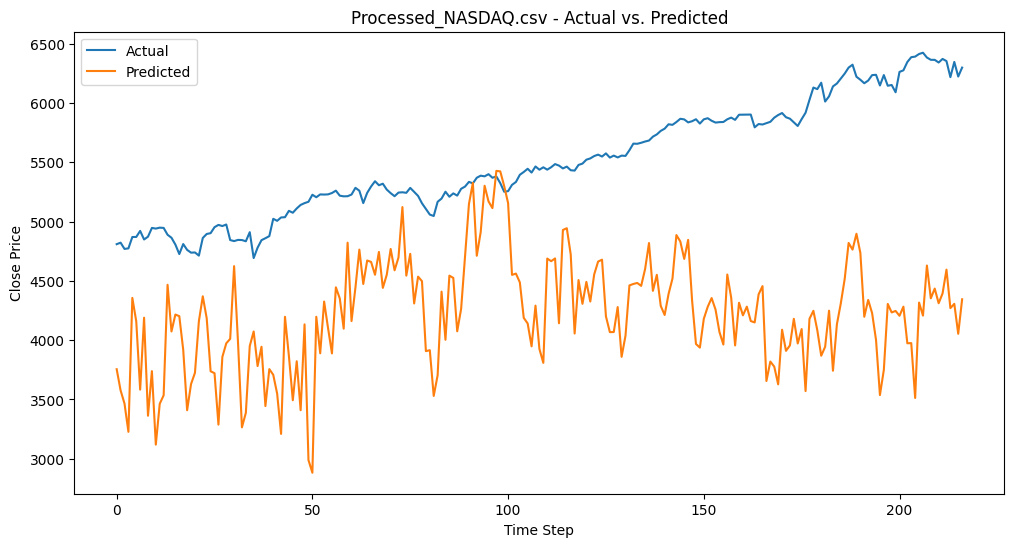

Model saved to model_Processed_NASDAQ.pth
✅ Finished processing dataset: Processed_NASDAQ.csv

--- Processing dataset: Processed_DJI.csv ---
Epoch 1/50, Training Loss: 0.0510
Epoch 2/50, Training Loss: 0.0378
Epoch 3/50, Training Loss: 0.0337
Epoch 4/50, Training Loss: 0.0342
Epoch 5/50, Training Loss: 0.0337
Epoch 6/50, Training Loss: 0.0340
Epoch 7/50, Training Loss: 0.0335
Epoch 8/50, Training Loss: 0.0335
Epoch 9/50, Training Loss: 0.0332
Epoch 10/50, Training Loss: 0.0336
Epoch 11/50, Training Loss: 0.0334
Epoch 12/50, Training Loss: 0.0319
Epoch 13/50, Training Loss: 0.0316
Epoch 14/50, Training Loss: 0.0314
Epoch 15/50, Training Loss: 0.0312
Epoch 16/50, Training Loss: 0.0305
Epoch 17/50, Training Loss: 0.0305
Epoch 18/50, Training Loss: 0.0298
Epoch 19/50, Training Loss: 0.0286
Epoch 20/50, Training Loss: 0.0296
Epoch 21/50, Training Loss: 0.0273
Epoch 22/50, Training Loss: 0.0276
Epoch 23/50, Training Loss: 0.0258
Epoch 24/50, Training Loss: 0.0244
Epoch 25/50, Training Loss: 

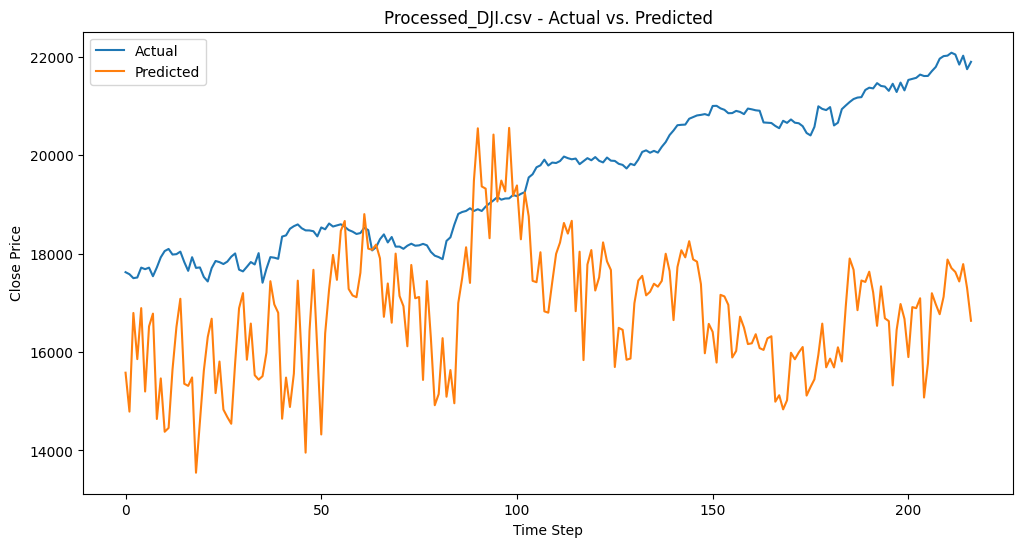

Model saved to model_Processed_DJI.pth
✅ Finished processing dataset: Processed_DJI.csv

🎉 All datasets processed successfully!


In [17]:
# PatchTST Model
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PatchTST import Model
from types import SimpleNamespace

# Prepare data function
def prepare_data(filename, window_size=30, pred_horizon=1):
    df = pd.read_csv(filename)
    if 'Date' in df.columns:
        df = df.drop(columns=["Date"])
    df_numeric = df.select_dtypes(include=[np.number])
    num_features = len(df_numeric.columns)
    df_dropna = df_numeric.dropna()
    data = df_dropna.values
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    X, y = [], []
    for i in range(len(data_scaled) - window_size - pred_horizon + 1):
        X.append(data_scaled[i:i + window_size])
        y.append(data_scaled[i + window_size + pred_horizon - 1, 0])  # predicting 'Close' column
    return np.array(X), np.array(y), scaler, num_features

# Example usage of prepare_data
window_size = 30
pred_horizon = 1
batch_size = 32
learning_rate = 1e-4
num_epochs = 50
datasets = ["Processed_SP.csv", "Processed_RUSSELL.csv", "Processed_NYSE.csv", "Processed_NASDAQ.csv", "Processed_DJI.csv"]

for dataset_name in datasets:
    print(f"\n--- Processing dataset: {dataset_name} ---")
    X, y, scaler, num_features = prepare_data(dataset_name, window_size, pred_horizon)

    # Split data into training and validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Convert data into PyTorch tensors
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Model config
    config = {
        'task_name': 'long_term_forecast',
        'seq_len': window_size,
        'pred_len': pred_horizon,
        'd_model': 128,
        'n_heads': 8,
        'd_ff': 256,
        'e_layers': 3,
        'dropout': 0.1,
        'factor': 5,
        'activation': 'relu',
        'enc_in': num_features  # Use the determined number of input features
    }

    # Convert the dictionary config to an object using SimpleNamespace
    config_obj = SimpleNamespace(**config)

    # Initialize the model
    model = Model(config_obj)

    # Train and evaluate function
    def train_and_evaluate(model, train_loader, val_loader, num_epochs, learning_rate):
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)

        for epoch in range(num_epochs):
            model.train()
            total_loss = 0
            for batch_X, batch_y in train_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                optimizer.zero_grad()

                outputs = model(batch_X, None, None, None)
                outputs = outputs.mean(dim=-1).squeeze()

                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {total_loss / len(train_loader):.4f}")

        # --- Evaluation ---
        model.eval()
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                preds = model(batch_X, None, None, None)
                preds = preds.mean(dim=-1).squeeze()
                all_preds.append(preds.cpu().numpy())
                all_targets.append(batch_y.cpu().numpy())

        all_preds = np.concatenate(all_preds, axis=0)
        all_targets = np.concatenate(all_targets, axis=0)
        mse = np.mean((all_preds - all_targets) ** 2)
        print(f"Validation MSE: {mse:.4f}")
        return all_preds, all_targets

    # Train and evaluate model
    predictions, targets = train_and_evaluate(model, train_loader, val_loader, num_epochs, learning_rate)

    # Inverse transform (scale back to original)
    predictions_original_scale = scaler.inverse_transform(
        np.concatenate([predictions.reshape(-1, 1), np.zeros((len(predictions), num_features - 1))], axis=1)
    )[:, 0]

    targets_original_scale = scaler.inverse_transform(
        np.concatenate([targets.reshape(-1, 1), np.zeros((len(targets), num_features - 1))], axis=1)
    )[:, 0]

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(targets_original_scale, label='Actual')
    plt.plot(predictions_original_scale, label='Predicted')
    plt.title(f'{dataset_name} - Actual vs. Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

    # Save model
    model_path = f"model_{dataset_name.replace('.csv', '')}.pth"
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")
    print(f"✅ Finished processing dataset: {dataset_name}")

print("\n🎉 All datasets processed successfully!")



--- Processing dataset: Processed_SP.csv ---
Epoch 1/50, Training Loss: 0.0734
Epoch 2/50, Training Loss: 0.0173
Epoch 3/50, Training Loss: 0.0020
Epoch 4/50, Training Loss: 0.0007
Epoch 5/50, Training Loss: 0.0006
Epoch 6/50, Training Loss: 0.0006
Epoch 7/50, Training Loss: 0.0005
Epoch 8/50, Training Loss: 0.0005
Epoch 9/50, Training Loss: 0.0004
Epoch 10/50, Training Loss: 0.0004
Epoch 11/50, Training Loss: 0.0005
Epoch 12/50, Training Loss: 0.0004
Epoch 13/50, Training Loss: 0.0006
Epoch 14/50, Training Loss: 0.0004
Epoch 15/50, Training Loss: 0.0004
Epoch 16/50, Training Loss: 0.0003
Epoch 17/50, Training Loss: 0.0003
Epoch 18/50, Training Loss: 0.0004
Epoch 19/50, Training Loss: 0.0004
Epoch 20/50, Training Loss: 0.0005
Epoch 21/50, Training Loss: 0.0003
Epoch 22/50, Training Loss: 0.0004
Epoch 23/50, Training Loss: 0.0004
Epoch 24/50, Training Loss: 0.0004
Epoch 25/50, Training Loss: 0.0003
Epoch 26/50, Training Loss: 0.0003
Epoch 27/50, Training Loss: 0.0005
Epoch 28/50, Train

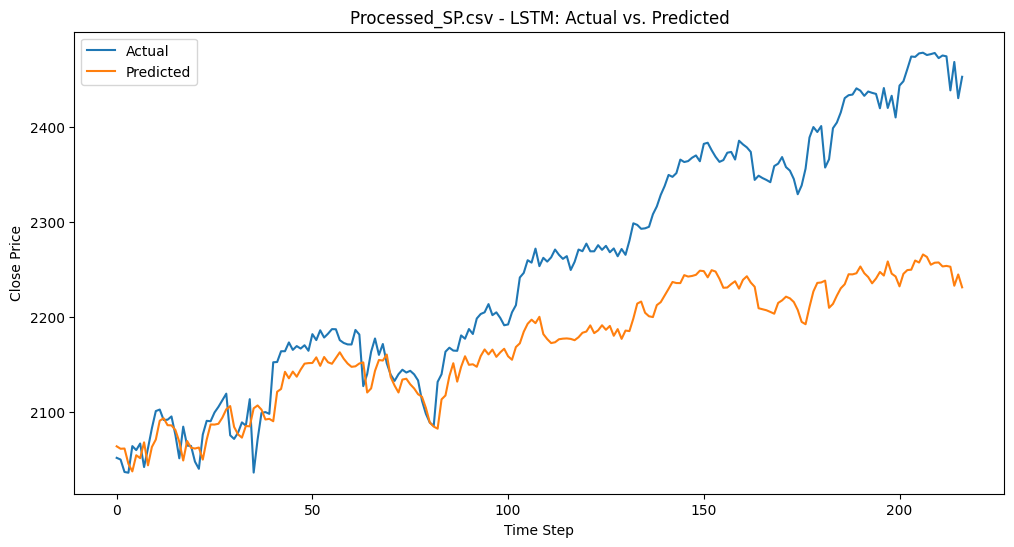

Model saved to lstm_Processed_SP.pth
✅ Finished processing dataset: Processed_SP.csv

--- Processing dataset: Processed_RUSSELL.csv ---
Epoch 1/50, Training Loss: 0.0729
Epoch 2/50, Training Loss: 0.0223
Epoch 3/50, Training Loss: 0.0032
Epoch 4/50, Training Loss: 0.0023
Epoch 5/50, Training Loss: 0.0015
Epoch 6/50, Training Loss: 0.0014
Epoch 7/50, Training Loss: 0.0013
Epoch 8/50, Training Loss: 0.0009
Epoch 9/50, Training Loss: 0.0008
Epoch 10/50, Training Loss: 0.0007
Epoch 11/50, Training Loss: 0.0008
Epoch 12/50, Training Loss: 0.0010
Epoch 13/50, Training Loss: 0.0006
Epoch 14/50, Training Loss: 0.0007
Epoch 15/50, Training Loss: 0.0006
Epoch 16/50, Training Loss: 0.0005
Epoch 17/50, Training Loss: 0.0007
Epoch 18/50, Training Loss: 0.0005
Epoch 19/50, Training Loss: 0.0008
Epoch 20/50, Training Loss: 0.0006
Epoch 21/50, Training Loss: 0.0006
Epoch 22/50, Training Loss: 0.0006
Epoch 23/50, Training Loss: 0.0005
Epoch 24/50, Training Loss: 0.0006
Epoch 25/50, Training Loss: 0.000

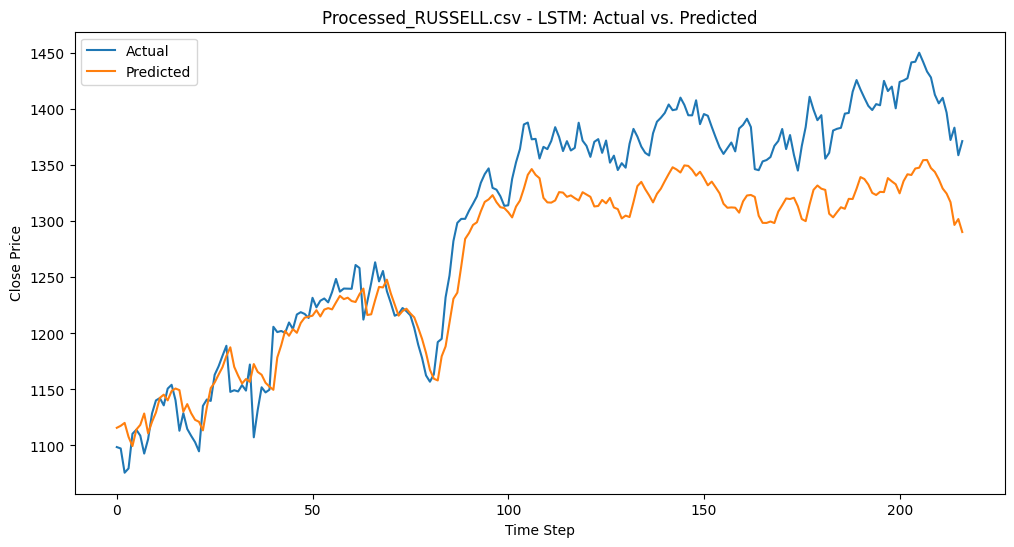

Model saved to lstm_Processed_RUSSELL.pth
✅ Finished processing dataset: Processed_RUSSELL.csv

--- Processing dataset: Processed_NYSE.csv ---
Epoch 1/50, Training Loss: 0.0706
Epoch 2/50, Training Loss: 0.0130
Epoch 3/50, Training Loss: 0.0029
Epoch 4/50, Training Loss: 0.0019
Epoch 5/50, Training Loss: 0.0015
Epoch 6/50, Training Loss: 0.0014
Epoch 7/50, Training Loss: 0.0011
Epoch 8/50, Training Loss: 0.0010
Epoch 9/50, Training Loss: 0.0009
Epoch 10/50, Training Loss: 0.0009
Epoch 11/50, Training Loss: 0.0010
Epoch 12/50, Training Loss: 0.0009
Epoch 13/50, Training Loss: 0.0009
Epoch 14/50, Training Loss: 0.0007
Epoch 15/50, Training Loss: 0.0008
Epoch 16/50, Training Loss: 0.0008
Epoch 17/50, Training Loss: 0.0006
Epoch 18/50, Training Loss: 0.0009
Epoch 19/50, Training Loss: 0.0006
Epoch 20/50, Training Loss: 0.0008
Epoch 21/50, Training Loss: 0.0007
Epoch 22/50, Training Loss: 0.0007
Epoch 23/50, Training Loss: 0.0009
Epoch 24/50, Training Loss: 0.0008
Epoch 25/50, Training Loss

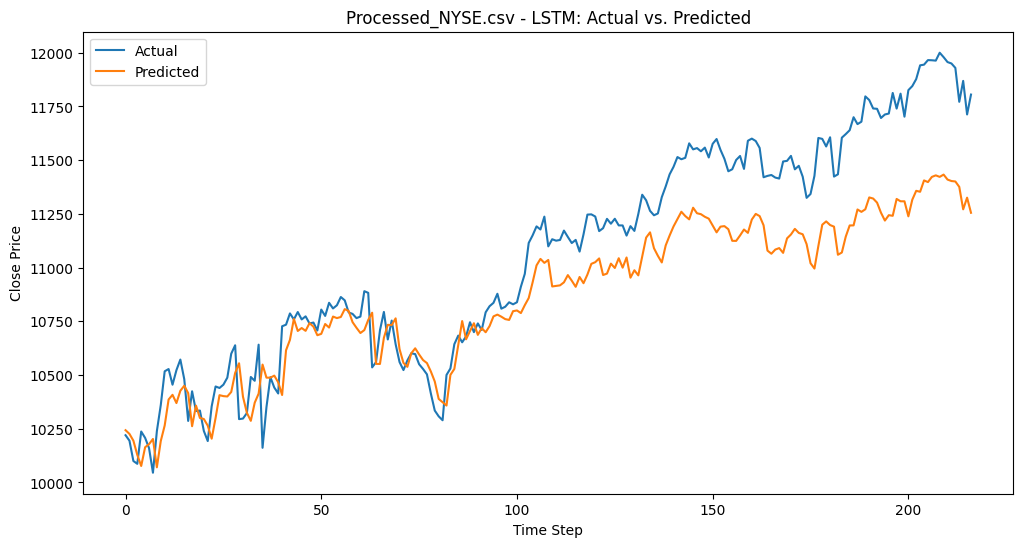

Model saved to lstm_Processed_NYSE.pth
✅ Finished processing dataset: Processed_NYSE.csv

--- Processing dataset: Processed_NASDAQ.csv ---
Epoch 1/50, Training Loss: 0.0360
Epoch 2/50, Training Loss: 0.0021
Epoch 3/50, Training Loss: 0.0008
Epoch 4/50, Training Loss: 0.0006
Epoch 5/50, Training Loss: 0.0005
Epoch 6/50, Training Loss: 0.0007
Epoch 7/50, Training Loss: 0.0005
Epoch 8/50, Training Loss: 0.0006
Epoch 9/50, Training Loss: 0.0004
Epoch 10/50, Training Loss: 0.0004
Epoch 11/50, Training Loss: 0.0003
Epoch 12/50, Training Loss: 0.0003
Epoch 13/50, Training Loss: 0.0003
Epoch 14/50, Training Loss: 0.0003
Epoch 15/50, Training Loss: 0.0003
Epoch 16/50, Training Loss: 0.0003
Epoch 17/50, Training Loss: 0.0003
Epoch 18/50, Training Loss: 0.0003
Epoch 19/50, Training Loss: 0.0003
Epoch 20/50, Training Loss: 0.0003
Epoch 21/50, Training Loss: 0.0004
Epoch 22/50, Training Loss: 0.0002
Epoch 23/50, Training Loss: 0.0003
Epoch 24/50, Training Loss: 0.0003
Epoch 25/50, Training Loss: 0.

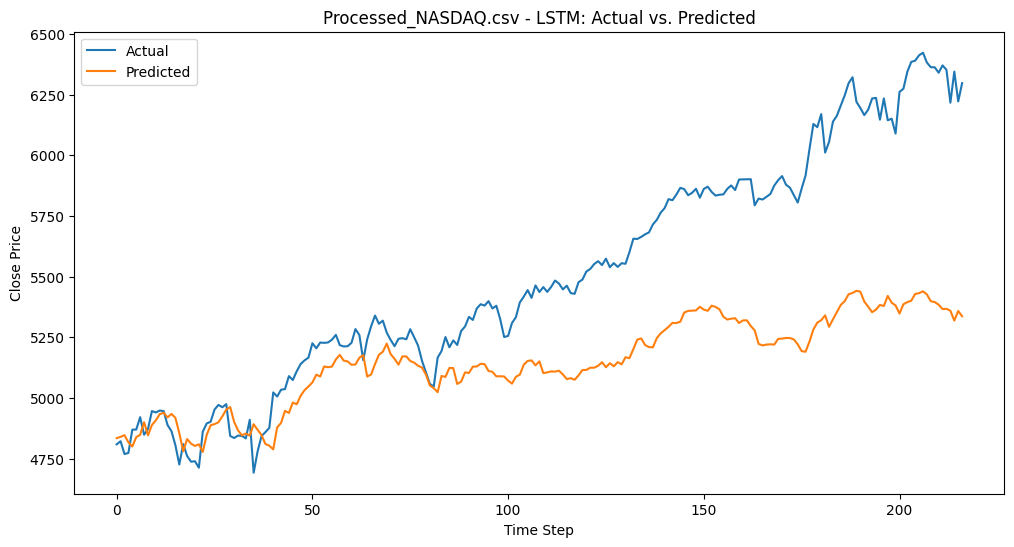

Model saved to lstm_Processed_NASDAQ.pth
✅ Finished processing dataset: Processed_NASDAQ.csv

--- Processing dataset: Processed_DJI.csv ---
Epoch 1/50, Training Loss: 0.0492
Epoch 2/50, Training Loss: 0.0123
Epoch 3/50, Training Loss: 0.0018
Epoch 4/50, Training Loss: 0.0010
Epoch 5/50, Training Loss: 0.0009
Epoch 6/50, Training Loss: 0.0006
Epoch 7/50, Training Loss: 0.0006
Epoch 8/50, Training Loss: 0.0007
Epoch 9/50, Training Loss: 0.0004
Epoch 10/50, Training Loss: 0.0006
Epoch 11/50, Training Loss: 0.0005
Epoch 12/50, Training Loss: 0.0004
Epoch 13/50, Training Loss: 0.0005
Epoch 14/50, Training Loss: 0.0004
Epoch 15/50, Training Loss: 0.0004
Epoch 16/50, Training Loss: 0.0004
Epoch 17/50, Training Loss: 0.0005
Epoch 18/50, Training Loss: 0.0004
Epoch 19/50, Training Loss: 0.0004
Epoch 20/50, Training Loss: 0.0004
Epoch 21/50, Training Loss: 0.0004
Epoch 22/50, Training Loss: 0.0005
Epoch 23/50, Training Loss: 0.0003
Epoch 24/50, Training Loss: 0.0004
Epoch 25/50, Training Loss: 0

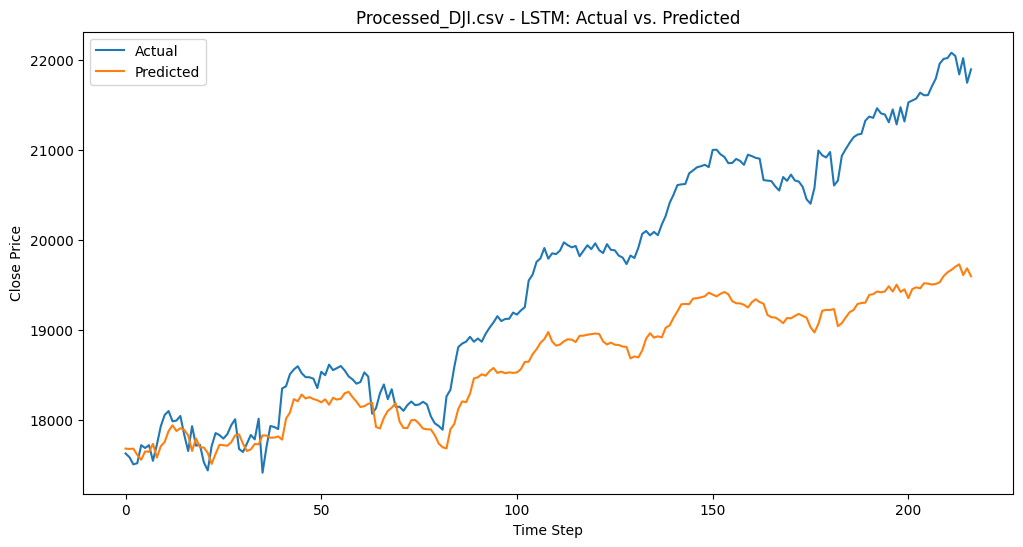

Model saved to lstm_Processed_DJI.pth
✅ Finished processing dataset: Processed_DJI.csv

🎉 All LSTM models processed successfully!


In [20]:
# LSTM model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# LSTM Model Definition
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Last time step
        out = self.fc(out)
        return out.squeeze()

# Data preparation function
def prepare_data(filename, window_size=30, pred_horizon=1):
    df = pd.read_csv(filename)
    if 'Date' in df.columns:
        df = df.drop(columns=["Date"])
    df_numeric = df.select_dtypes(include=[np.number])
    num_features = len(df_numeric.columns)
    df_dropna = df_numeric.dropna()
    data = df_dropna.values
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(data_scaled) - window_size - pred_horizon + 1):
        X.append(data_scaled[i:i + window_size])
        y.append(data_scaled[i + window_size + pred_horizon - 1, 0])  # predict 'Close'
    return np.array(X), np.array(y), scaler, num_features

# Training and evaluation function
def train_and_evaluate_lstm(model, train_loader, val_loader, num_epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {total_loss / len(train_loader):.4f}")

    # Evaluation
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            preds = model(batch_X)
            all_preds.append(preds.cpu().numpy())
            all_targets.append(batch_y.cpu().numpy())

    all_preds = np.concatenate(all_preds, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)
    mse = np.mean((all_preds - all_targets) ** 2)
    print(f"Validation MSE: {mse:.4f}")
    return all_preds, all_targets

# Hyperparameters
window_size = 30
pred_horizon = 1
batch_size = 32
learning_rate = 1e-3
num_epochs = 50

# Dataset list
datasets = ["Processed_SP.csv", "Processed_RUSSELL.csv", "Processed_NYSE.csv", "Processed_NASDAQ.csv", "Processed_DJI.csv"]

# Loop over datasets
for dataset_name in datasets:
    print(f"\n--- Processing dataset: {dataset_name} ---")
    X, y, scaler, num_features = prepare_data(dataset_name, window_size, pred_horizon)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    model = LSTMModel(input_size=num_features)

    # Train and evaluate
    predictions, targets = train_and_evaluate_lstm(model, train_loader, val_loader, num_epochs, learning_rate)

    # Inverse transform
    predictions_original = scaler.inverse_transform(
        np.concatenate([predictions.reshape(-1, 1), np.zeros((len(predictions), num_features - 1))], axis=1)
    )[:, 0]
    targets_original = scaler.inverse_transform(
        np.concatenate([targets.reshape(-1, 1), np.zeros((len(targets), num_features - 1))], axis=1)
    )[:, 0]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(targets_original, label='Actual')
    plt.plot(predictions_original, label='Predicted')
    plt.title(f'{dataset_name} - LSTM: Actual vs. Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

    # Save model
    model_path = f"lstm_{dataset_name.replace('.csv', '')}.pth"
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")
    print(f"✅ Finished processing dataset: {dataset_name}")

print("\n🎉 All LSTM models processed successfully!")



--- Processing dataset: Processed_SP.csv ---
Epoch 1/50, Training Loss: 0.0385
Epoch 2/50, Training Loss: 0.0023
Epoch 3/50, Training Loss: 0.0011
Epoch 4/50, Training Loss: 0.0006
Epoch 5/50, Training Loss: 0.0004
Epoch 6/50, Training Loss: 0.0004
Epoch 7/50, Training Loss: 0.0007
Epoch 8/50, Training Loss: 0.0005
Epoch 9/50, Training Loss: 0.0004
Epoch 10/50, Training Loss: 0.0004
Epoch 11/50, Training Loss: 0.0003
Epoch 12/50, Training Loss: 0.0004
Epoch 13/50, Training Loss: 0.0003
Epoch 14/50, Training Loss: 0.0003
Epoch 15/50, Training Loss: 0.0003
Epoch 16/50, Training Loss: 0.0003
Epoch 17/50, Training Loss: 0.0003
Epoch 18/50, Training Loss: 0.0003
Epoch 19/50, Training Loss: 0.0004
Epoch 20/50, Training Loss: 0.0003
Epoch 21/50, Training Loss: 0.0003
Epoch 22/50, Training Loss: 0.0003
Epoch 23/50, Training Loss: 0.0003
Epoch 24/50, Training Loss: 0.0003
Epoch 25/50, Training Loss: 0.0003
Epoch 26/50, Training Loss: 0.0004
Epoch 27/50, Training Loss: 0.0005
Epoch 28/50, Train

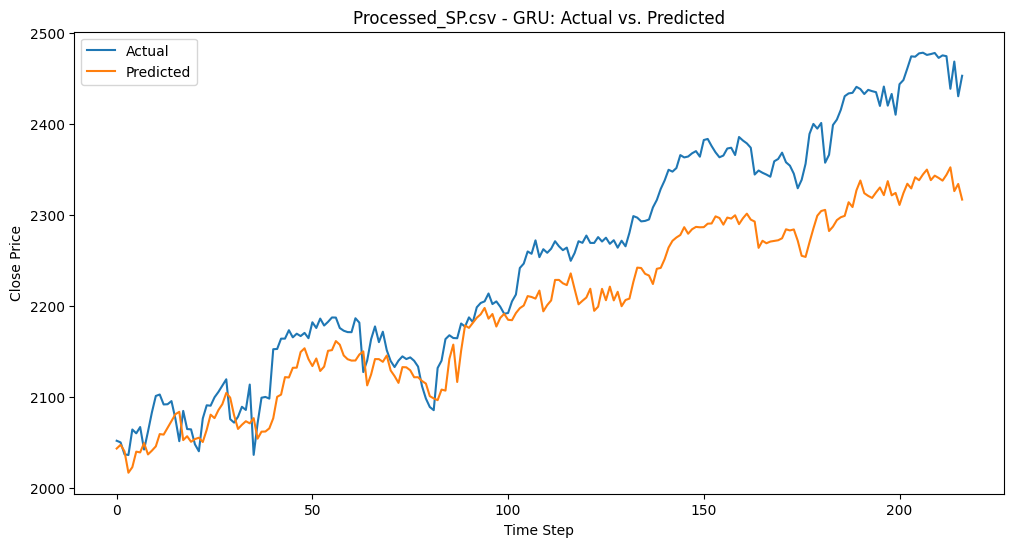

Model saved to gru_Processed_SP.pth
✅ Finished processing dataset: Processed_SP.csv

--- Processing dataset: Processed_RUSSELL.csv ---
Epoch 1/50, Training Loss: 0.0533
Epoch 2/50, Training Loss: 0.0076
Epoch 3/50, Training Loss: 0.0016
Epoch 4/50, Training Loss: 0.0011
Epoch 5/50, Training Loss: 0.0008
Epoch 6/50, Training Loss: 0.0008
Epoch 7/50, Training Loss: 0.0007
Epoch 8/50, Training Loss: 0.0005
Epoch 9/50, Training Loss: 0.0006
Epoch 10/50, Training Loss: 0.0008
Epoch 11/50, Training Loss: 0.0007
Epoch 12/50, Training Loss: 0.0005
Epoch 13/50, Training Loss: 0.0006
Epoch 14/50, Training Loss: 0.0004
Epoch 15/50, Training Loss: 0.0005
Epoch 16/50, Training Loss: 0.0006
Epoch 17/50, Training Loss: 0.0004
Epoch 18/50, Training Loss: 0.0006
Epoch 19/50, Training Loss: 0.0011
Epoch 20/50, Training Loss: 0.0005
Epoch 21/50, Training Loss: 0.0005
Epoch 22/50, Training Loss: 0.0006
Epoch 23/50, Training Loss: 0.0005
Epoch 24/50, Training Loss: 0.0004
Epoch 25/50, Training Loss: 0.0008

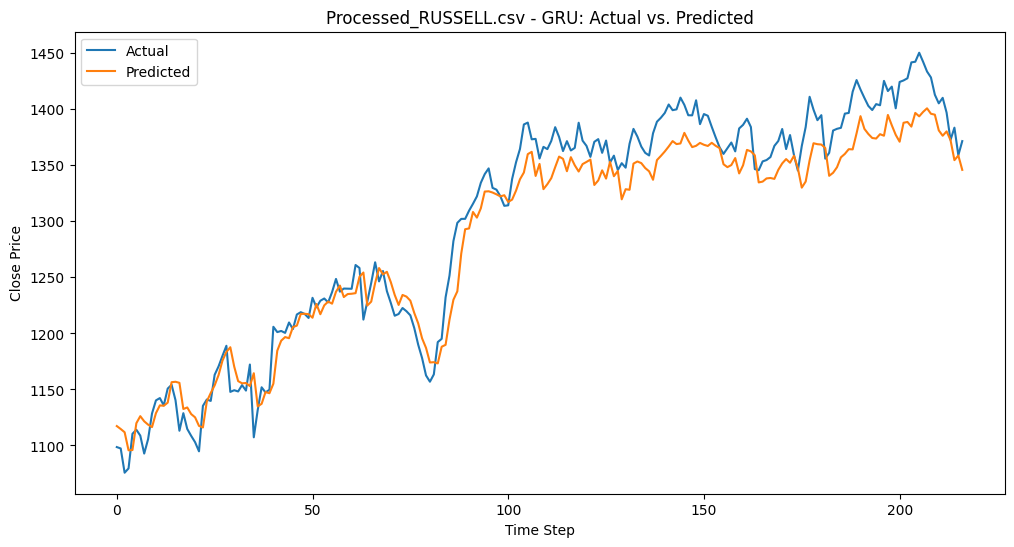

Model saved to gru_Processed_RUSSELL.pth
✅ Finished processing dataset: Processed_RUSSELL.csv

--- Processing dataset: Processed_NYSE.csv ---
Epoch 1/50, Training Loss: 0.0805
Epoch 2/50, Training Loss: 0.0108
Epoch 3/50, Training Loss: 0.0021
Epoch 4/50, Training Loss: 0.0013
Epoch 5/50, Training Loss: 0.0011
Epoch 6/50, Training Loss: 0.0008
Epoch 7/50, Training Loss: 0.0007
Epoch 8/50, Training Loss: 0.0008
Epoch 9/50, Training Loss: 0.0008
Epoch 10/50, Training Loss: 0.0007
Epoch 11/50, Training Loss: 0.0007
Epoch 12/50, Training Loss: 0.0006
Epoch 13/50, Training Loss: 0.0006
Epoch 14/50, Training Loss: 0.0009
Epoch 15/50, Training Loss: 0.0015
Epoch 16/50, Training Loss: 0.0010
Epoch 17/50, Training Loss: 0.0006
Epoch 18/50, Training Loss: 0.0005
Epoch 19/50, Training Loss: 0.0005
Epoch 20/50, Training Loss: 0.0007
Epoch 21/50, Training Loss: 0.0005
Epoch 22/50, Training Loss: 0.0005
Epoch 23/50, Training Loss: 0.0005
Epoch 24/50, Training Loss: 0.0005
Epoch 25/50, Training Loss:

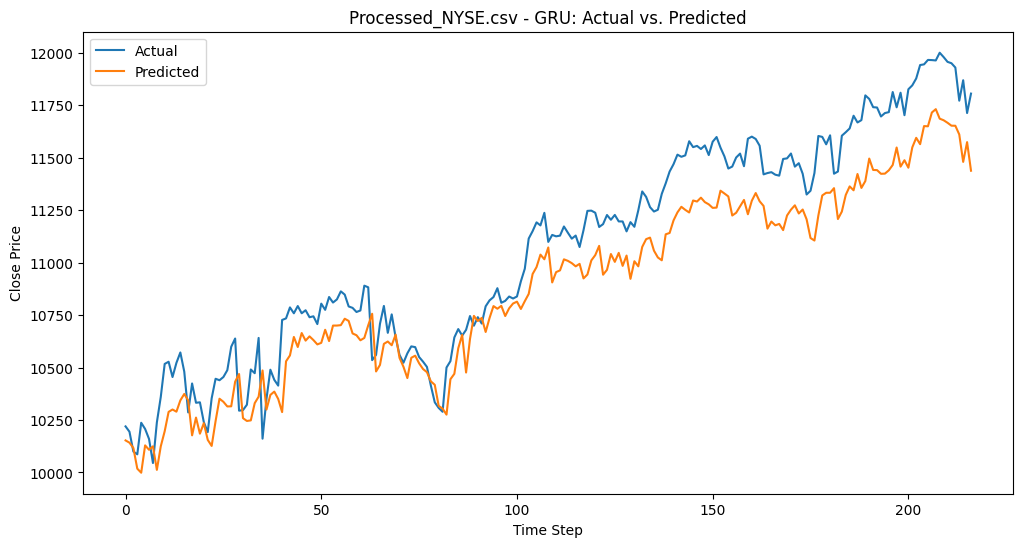

Model saved to gru_Processed_NYSE.pth
✅ Finished processing dataset: Processed_NYSE.csv

--- Processing dataset: Processed_NASDAQ.csv ---
Epoch 1/50, Training Loss: 0.0351
Epoch 2/50, Training Loss: 0.0037
Epoch 3/50, Training Loss: 0.0006
Epoch 4/50, Training Loss: 0.0003
Epoch 5/50, Training Loss: 0.0003
Epoch 6/50, Training Loss: 0.0002
Epoch 7/50, Training Loss: 0.0003
Epoch 8/50, Training Loss: 0.0002
Epoch 9/50, Training Loss: 0.0002
Epoch 10/50, Training Loss: 0.0004
Epoch 11/50, Training Loss: 0.0003
Epoch 12/50, Training Loss: 0.0002
Epoch 13/50, Training Loss: 0.0003
Epoch 14/50, Training Loss: 0.0003
Epoch 15/50, Training Loss: 0.0003
Epoch 16/50, Training Loss: 0.0003
Epoch 17/50, Training Loss: 0.0002
Epoch 18/50, Training Loss: 0.0002
Epoch 19/50, Training Loss: 0.0003
Epoch 20/50, Training Loss: 0.0002
Epoch 21/50, Training Loss: 0.0003
Epoch 22/50, Training Loss: 0.0003
Epoch 23/50, Training Loss: 0.0003
Epoch 24/50, Training Loss: 0.0003
Epoch 25/50, Training Loss: 0.0

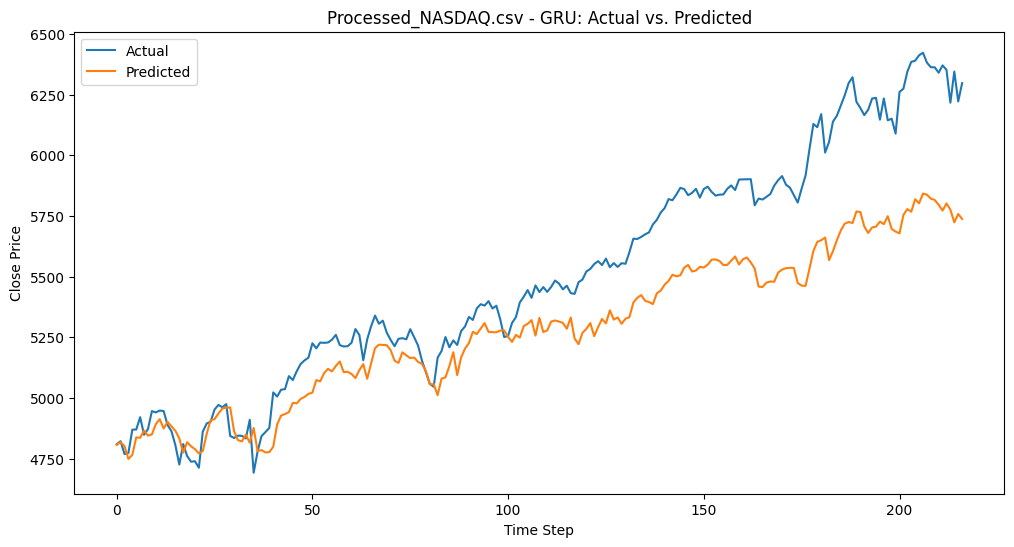

Model saved to gru_Processed_NASDAQ.pth
✅ Finished processing dataset: Processed_NASDAQ.csv

--- Processing dataset: Processed_DJI.csv ---
Epoch 1/50, Training Loss: 0.0354
Epoch 2/50, Training Loss: 0.0041
Epoch 3/50, Training Loss: 0.0012
Epoch 4/50, Training Loss: 0.0007
Epoch 5/50, Training Loss: 0.0006
Epoch 6/50, Training Loss: 0.0006
Epoch 7/50, Training Loss: 0.0004
Epoch 8/50, Training Loss: 0.0004
Epoch 9/50, Training Loss: 0.0004
Epoch 10/50, Training Loss: 0.0007
Epoch 11/50, Training Loss: 0.0004
Epoch 12/50, Training Loss: 0.0003
Epoch 13/50, Training Loss: 0.0004
Epoch 14/50, Training Loss: 0.0003
Epoch 15/50, Training Loss: 0.0003
Epoch 16/50, Training Loss: 0.0004
Epoch 17/50, Training Loss: 0.0003
Epoch 18/50, Training Loss: 0.0003
Epoch 19/50, Training Loss: 0.0004
Epoch 20/50, Training Loss: 0.0005
Epoch 21/50, Training Loss: 0.0005
Epoch 22/50, Training Loss: 0.0003
Epoch 23/50, Training Loss: 0.0003
Epoch 24/50, Training Loss: 0.0003
Epoch 25/50, Training Loss: 0.

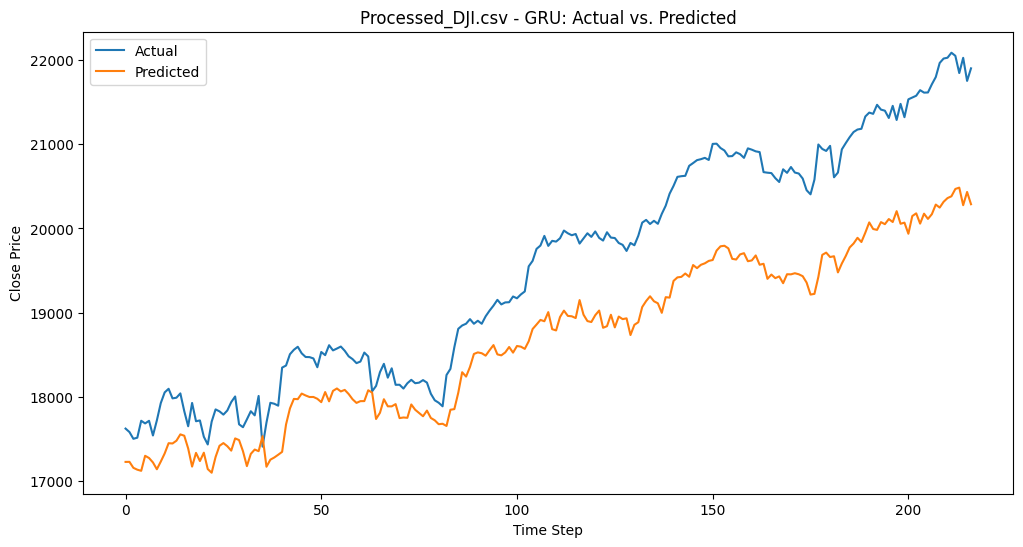

Model saved to gru_Processed_DJI.pth
✅ Finished processing dataset: Processed_DJI.csv

🎉 All GRU models processed successfully!


In [21]:
# GRU model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# GRU Model Definition
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, output_size=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out.squeeze()

# Data preparation (same as before)
def prepare_data(filename, window_size=30, pred_horizon=1):
    df = pd.read_csv(filename)
    if 'Date' in df.columns:
        df = df.drop(columns=["Date"])
    df_numeric = df.select_dtypes(include=[np.number])
    num_features = len(df_numeric.columns)
    df_dropna = df_numeric.dropna()
    data = df_dropna.values
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(data_scaled) - window_size - pred_horizon + 1):
        X.append(data_scaled[i:i + window_size])
        y.append(data_scaled[i + window_size + pred_horizon - 1, 0])
    return np.array(X), np.array(y), scaler, num_features

# Train & Evaluate
def train_and_evaluate_gru(model, train_loader, val_loader, num_epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {total_loss / len(train_loader):.4f}")

    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            preds = model(batch_X)
            all_preds.append(preds.cpu().numpy())
            all_targets.append(batch_y.cpu().numpy())

    all_preds = np.concatenate(all_preds, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)
    mse = np.mean((all_preds - all_targets) ** 2)
    print(f"Validation MSE: {mse:.4f}")
    return all_preds, all_targets

# Hyperparameters
window_size = 30
pred_horizon = 1
batch_size = 32
learning_rate = 1e-3
num_epochs = 50

# Datasets
datasets = ["Processed_SP.csv", "Processed_RUSSELL.csv", "Processed_NYSE.csv", "Processed_NASDAQ.csv", "Processed_DJI.csv"]

for dataset_name in datasets:
    print(f"\n--- Processing dataset: {dataset_name} ---")
    X, y, scaler, num_features = prepare_data(dataset_name, window_size, pred_horizon)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    model = GRUModel(input_size=num_features)

    # Train and evaluate
    predictions, targets = train_and_evaluate_gru(model, train_loader, val_loader, num_epochs, learning_rate)

    # Inverse scale
    predictions_original = scaler.inverse_transform(
        np.concatenate([predictions.reshape(-1, 1), np.zeros((len(predictions), num_features - 1))], axis=1)
    )[:, 0]
    targets_original = scaler.inverse_transform(
        np.concatenate([targets.reshape(-1, 1), np.zeros((len(targets), num_features - 1))], axis=1)
    )[:, 0]

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(targets_original, label='Actual')
    plt.plot(predictions_original, label='Predicted')
    plt.title(f'{dataset_name} - GRU: Actual vs. Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

    # Save model
    model_path = f"gru_{dataset_name.replace('.csv', '')}.pth"
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")
    print(f"✅ Finished processing dataset: {dataset_name}")

print("\n🎉 All GRU models processed successfully!")



--- Processing dataset: Processed_SP.csv ---
Epoch 1/50, Training Loss: 0.1696
Epoch 2/50, Training Loss: 0.0423
Epoch 3/50, Training Loss: 0.0124
Epoch 4/50, Training Loss: 0.0095
Epoch 5/50, Training Loss: 0.0057
Epoch 6/50, Training Loss: 0.0048
Epoch 7/50, Training Loss: 0.0051
Epoch 8/50, Training Loss: 0.0042
Epoch 9/50, Training Loss: 0.0039
Epoch 10/50, Training Loss: 0.0034
Epoch 11/50, Training Loss: 0.0033
Epoch 12/50, Training Loss: 0.0027
Epoch 13/50, Training Loss: 0.0025
Epoch 14/50, Training Loss: 0.0027
Epoch 15/50, Training Loss: 0.0022
Epoch 16/50, Training Loss: 0.0019
Epoch 17/50, Training Loss: 0.0020
Epoch 18/50, Training Loss: 0.0022
Epoch 19/50, Training Loss: 0.0021
Epoch 20/50, Training Loss: 0.0026
Epoch 21/50, Training Loss: 0.0015
Epoch 22/50, Training Loss: 0.0012
Epoch 23/50, Training Loss: 0.0014
Epoch 24/50, Training Loss: 0.0012
Epoch 25/50, Training Loss: 0.0014
Epoch 26/50, Training Loss: 0.0019
Epoch 27/50, Training Loss: 0.0013
Epoch 28/50, Train

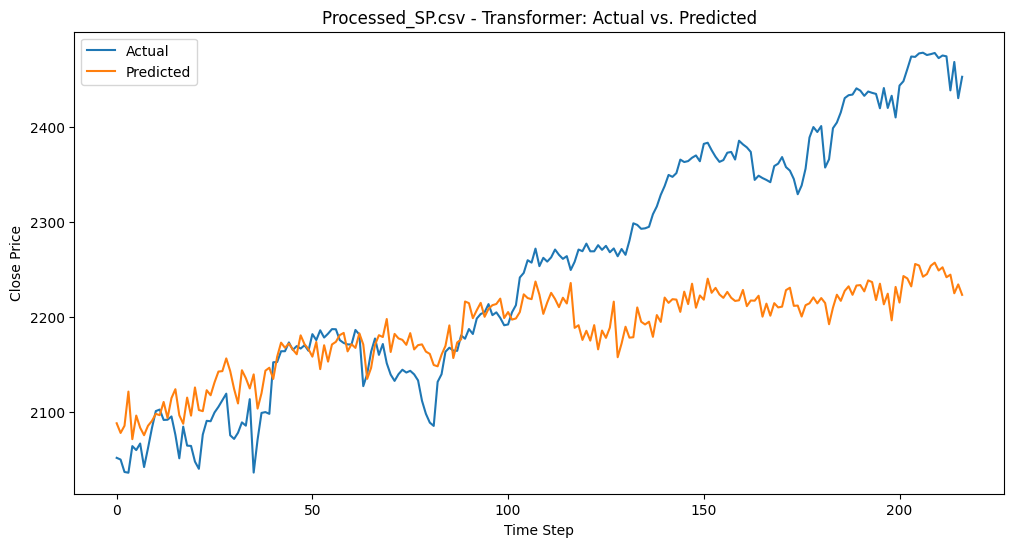

Model saved to transformer_Processed_SP.pth
✅ Finished processing dataset: Processed_SP.csv

--- Processing dataset: Processed_RUSSELL.csv ---
Epoch 1/50, Training Loss: 0.1307
Epoch 2/50, Training Loss: 0.0224
Epoch 3/50, Training Loss: 0.0095
Epoch 4/50, Training Loss: 0.0070
Epoch 5/50, Training Loss: 0.0063
Epoch 6/50, Training Loss: 0.0051
Epoch 7/50, Training Loss: 0.0044
Epoch 8/50, Training Loss: 0.0036
Epoch 9/50, Training Loss: 0.0034
Epoch 10/50, Training Loss: 0.0039
Epoch 11/50, Training Loss: 0.0037
Epoch 12/50, Training Loss: 0.0032
Epoch 13/50, Training Loss: 0.0027
Epoch 14/50, Training Loss: 0.0025
Epoch 15/50, Training Loss: 0.0031
Epoch 16/50, Training Loss: 0.0022
Epoch 17/50, Training Loss: 0.0018
Epoch 18/50, Training Loss: 0.0023
Epoch 19/50, Training Loss: 0.0019
Epoch 20/50, Training Loss: 0.0017
Epoch 21/50, Training Loss: 0.0020
Epoch 22/50, Training Loss: 0.0018
Epoch 23/50, Training Loss: 0.0024
Epoch 24/50, Training Loss: 0.0019
Epoch 25/50, Training Loss

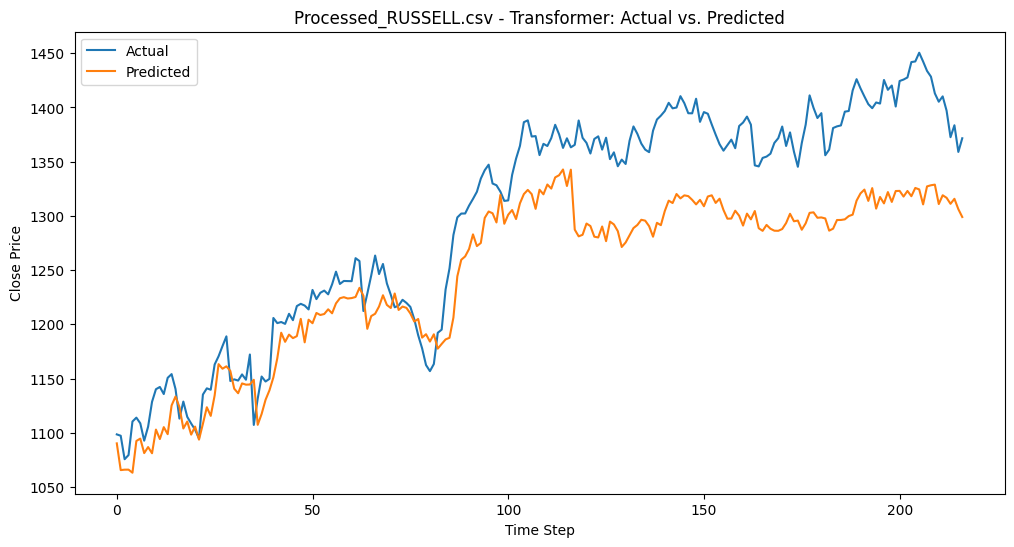

Model saved to transformer_Processed_RUSSELL.pth
✅ Finished processing dataset: Processed_RUSSELL.csv

--- Processing dataset: Processed_NYSE.csv ---
Epoch 1/50, Training Loss: 0.0739
Epoch 2/50, Training Loss: 0.0142
Epoch 3/50, Training Loss: 0.0072
Epoch 4/50, Training Loss: 0.0061
Epoch 5/50, Training Loss: 0.0055
Epoch 6/50, Training Loss: 0.0037
Epoch 7/50, Training Loss: 0.0034
Epoch 8/50, Training Loss: 0.0032
Epoch 9/50, Training Loss: 0.0038
Epoch 10/50, Training Loss: 0.0026
Epoch 11/50, Training Loss: 0.0022
Epoch 12/50, Training Loss: 0.0020
Epoch 13/50, Training Loss: 0.0019
Epoch 14/50, Training Loss: 0.0020
Epoch 15/50, Training Loss: 0.0019
Epoch 16/50, Training Loss: 0.0018
Epoch 17/50, Training Loss: 0.0020
Epoch 18/50, Training Loss: 0.0022
Epoch 19/50, Training Loss: 0.0018
Epoch 20/50, Training Loss: 0.0015
Epoch 21/50, Training Loss: 0.0016
Epoch 22/50, Training Loss: 0.0015
Epoch 23/50, Training Loss: 0.0020
Epoch 24/50, Training Loss: 0.0014
Epoch 25/50, Traini

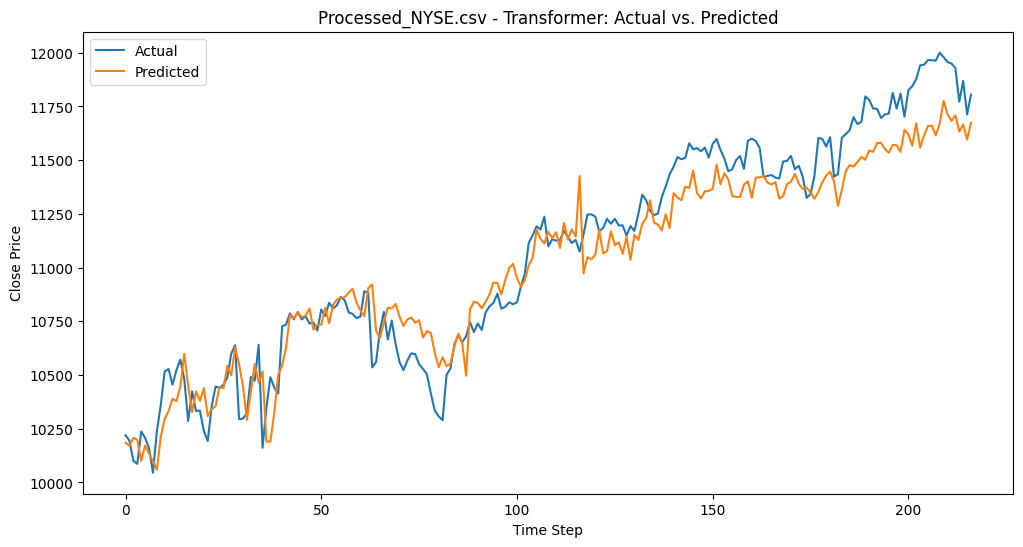

Model saved to transformer_Processed_NYSE.pth
✅ Finished processing dataset: Processed_NYSE.csv

--- Processing dataset: Processed_NASDAQ.csv ---
Epoch 1/50, Training Loss: 0.1361
Epoch 2/50, Training Loss: 0.0339
Epoch 3/50, Training Loss: 0.0103
Epoch 4/50, Training Loss: 0.0050
Epoch 5/50, Training Loss: 0.0045
Epoch 6/50, Training Loss: 0.0050
Epoch 7/50, Training Loss: 0.0033
Epoch 8/50, Training Loss: 0.0032
Epoch 9/50, Training Loss: 0.0027
Epoch 10/50, Training Loss: 0.0026
Epoch 11/50, Training Loss: 0.0027
Epoch 12/50, Training Loss: 0.0021
Epoch 13/50, Training Loss: 0.0017
Epoch 14/50, Training Loss: 0.0017
Epoch 15/50, Training Loss: 0.0016
Epoch 16/50, Training Loss: 0.0018
Epoch 17/50, Training Loss: 0.0016
Epoch 18/50, Training Loss: 0.0019
Epoch 19/50, Training Loss: 0.0017
Epoch 20/50, Training Loss: 0.0018
Epoch 21/50, Training Loss: 0.0014
Epoch 22/50, Training Loss: 0.0013
Epoch 23/50, Training Loss: 0.0011
Epoch 24/50, Training Loss: 0.0011
Epoch 25/50, Training L

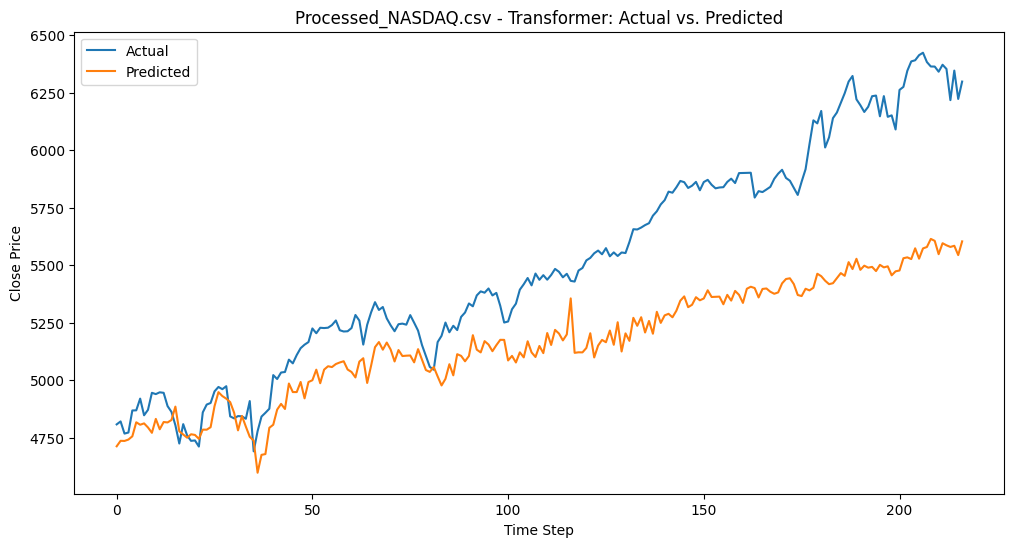

Model saved to transformer_Processed_NASDAQ.pth
✅ Finished processing dataset: Processed_NASDAQ.csv

--- Processing dataset: Processed_DJI.csv ---
Epoch 1/50, Training Loss: 0.1023
Epoch 2/50, Training Loss: 0.0294
Epoch 3/50, Training Loss: 0.0088
Epoch 4/50, Training Loss: 0.0062
Epoch 5/50, Training Loss: 0.0055
Epoch 6/50, Training Loss: 0.0039
Epoch 7/50, Training Loss: 0.0034
Epoch 8/50, Training Loss: 0.0039
Epoch 9/50, Training Loss: 0.0037
Epoch 10/50, Training Loss: 0.0025
Epoch 11/50, Training Loss: 0.0022
Epoch 12/50, Training Loss: 0.0020
Epoch 13/50, Training Loss: 0.0020
Epoch 14/50, Training Loss: 0.0019
Epoch 15/50, Training Loss: 0.0019
Epoch 16/50, Training Loss: 0.0018
Epoch 17/50, Training Loss: 0.0016
Epoch 18/50, Training Loss: 0.0014
Epoch 19/50, Training Loss: 0.0016
Epoch 20/50, Training Loss: 0.0023
Epoch 21/50, Training Loss: 0.0011
Epoch 22/50, Training Loss: 0.0011
Epoch 23/50, Training Loss: 0.0012
Epoch 24/50, Training Loss: 0.0013
Epoch 25/50, Training 

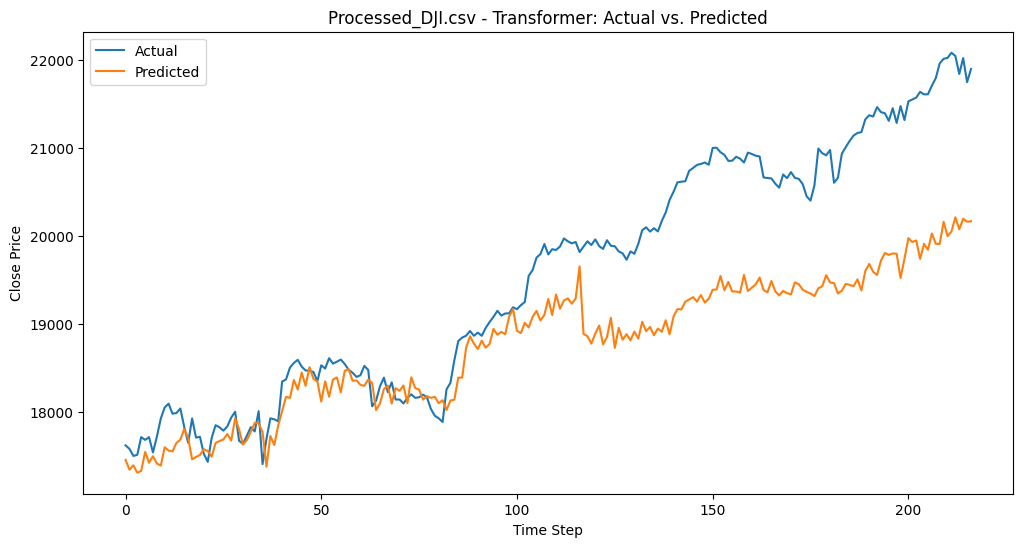

Model saved to transformer_Processed_DJI.pth
✅ Finished processing dataset: Processed_DJI.csv

🎉 All Transformer models processed successfully!


In [22]:
# Vanilla Transformer Model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Transformer model definition
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=64, nhead=4, num_layers=2, dim_feedforward=128, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.input_linear = nn.Linear(input_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead,
                                                   dim_feedforward=dim_feedforward, dropout=dropout,
                                                   batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.input_linear(x)
        x = self.transformer_encoder(x)
        out = x[:, -1, :]
        out = self.output_layer(out)
        return out.squeeze()

# Data preparation
def prepare_data(filename, window_size=30, pred_horizon=1):
    df = pd.read_csv(filename)
    if 'Date' in df.columns:
        df = df.drop(columns=["Date"])
    df_numeric = df.select_dtypes(include=[np.number])
    num_features = len(df_numeric.columns)
    df_dropna = df_numeric.dropna()
    data = df_dropna.values
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    X, y = [], []
    for i in range(len(data_scaled) - window_size - pred_horizon + 1):
        X.append(data_scaled[i:i + window_size])
        y.append(data_scaled[i + window_size + pred_horizon - 1, 0])
    return np.array(X), np.array(y), scaler, num_features

# Train & evaluate
def train_and_evaluate_transformer(model, train_loader, val_loader, num_epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {total_loss / len(train_loader):.4f}")

    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            preds = model(batch_X)
            all_preds.append(preds.cpu().numpy())
            all_targets.append(batch_y.cpu().numpy())

    all_preds = np.concatenate(all_preds, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)
    mse = np.mean((all_preds - all_targets) ** 2)
    print(f"Validation MSE: {mse:.4f}")
    return all_preds, all_targets

# Hyperparameters
window_size = 30
pred_horizon = 1
batch_size = 32
learning_rate = 1e-3
num_epochs = 50

datasets = ["Processed_SP.csv", "Processed_RUSSELL.csv", "Processed_NYSE.csv", "Processed_NASDAQ.csv", "Processed_DJI.csv"]

for dataset_name in datasets:
    print(f"\n--- Processing dataset: {dataset_name} ---")
    X, y, scaler, num_features = prepare_data(dataset_name, window_size, pred_horizon)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    model = TransformerModel(input_size=num_features)

    # Train and evaluate
    predictions, targets = train_and_evaluate_transformer(model, train_loader, val_loader, num_epochs, learning_rate)

    # Inverse scale
    predictions_original = scaler.inverse_transform(
        np.concatenate([predictions.reshape(-1, 1), np.zeros((len(predictions), num_features - 1))], axis=1)
    )[:, 0]
    targets_original = scaler.inverse_transform(
        np.concatenate([targets.reshape(-1, 1), np.zeros((len(targets), num_features - 1))], axis=1)
    )[:, 0]

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(targets_original, label='Actual')
    plt.plot(predictions_original, label='Predicted')
    plt.title(f'{dataset_name} - Transformer: Actual vs. Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

    # Save model
    model_path = f"transformer_{dataset_name.replace('.csv', '')}.pth"
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")
    print(f"✅ Finished processing dataset: {dataset_name}")

print("\n🎉 All Transformer models processed successfully!")


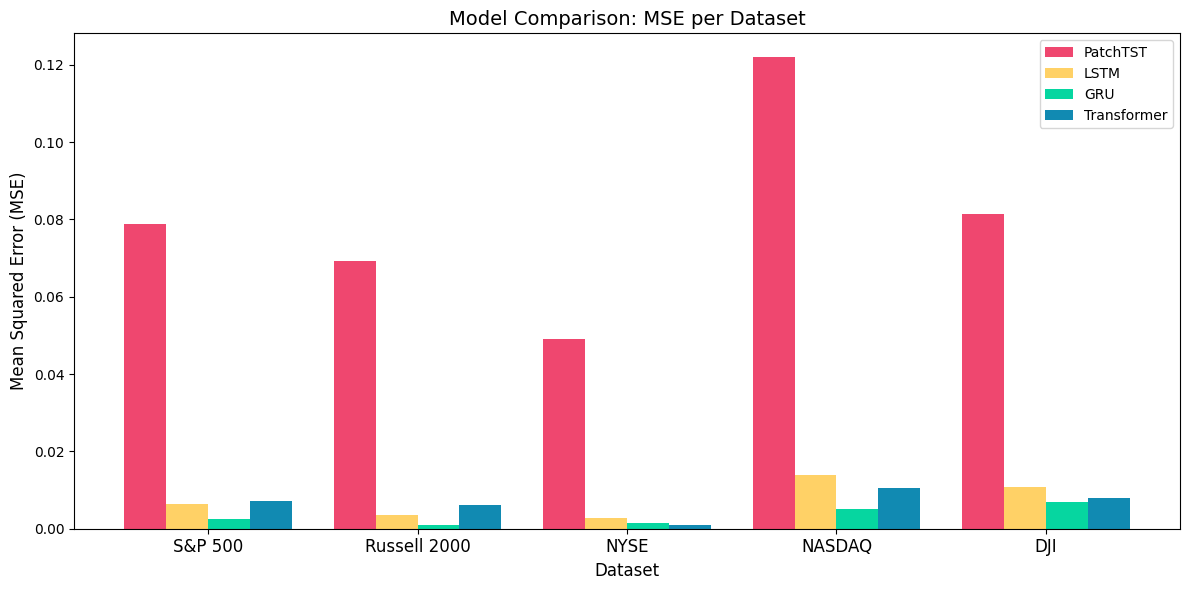

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset names
datasets = ["S&P 500", "Russell 2000", "NYSE", "NASDAQ", "DJI"]

# MSE values for each model across the datasets
patchtst_mse = [0.0788, 0.0692, 0.0490, 0.1220, 0.0814]
lstm_mse = [0.0063, 0.0036, 0.0027, 0.0140, 0.0108]
gru_mse = [0.0025, 0.0010, 0.0016, 0.0050, 0.0070]
transformer_mse = [0.0071, 0.0061, 0.0009, 0.0106, 0.0080]

# Number of datasets
n_datasets = len(datasets)

# Set width for the bars
bar_width = 0.2

# Create x positions for each model
index = np.arange(n_datasets)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each model's MSE values
ax.bar(index, patchtst_mse, bar_width, label='PatchTST', color="#ef476f")
ax.bar(index + bar_width, lstm_mse, bar_width, label='LSTM', color="#ffd166")
ax.bar(index + 2*bar_width, gru_mse, bar_width, label='GRU', color="#06d6a0")
ax.bar(index + 3*bar_width, transformer_mse, bar_width, label='Transformer', color="#118ab2")

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax.set_title('Model Comparison: MSE per Dataset', fontsize=14)
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(datasets, fontsize=12)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


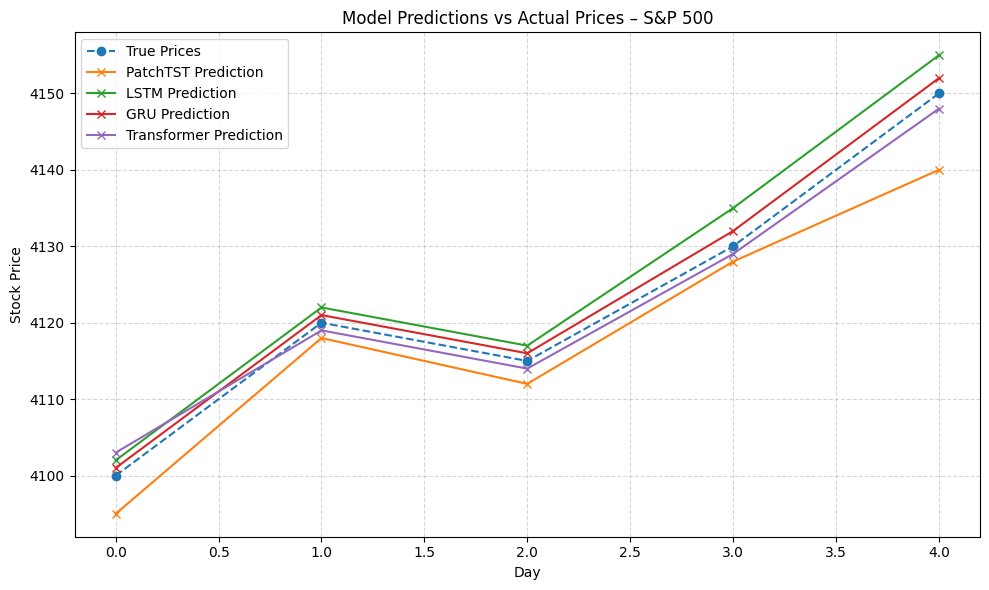

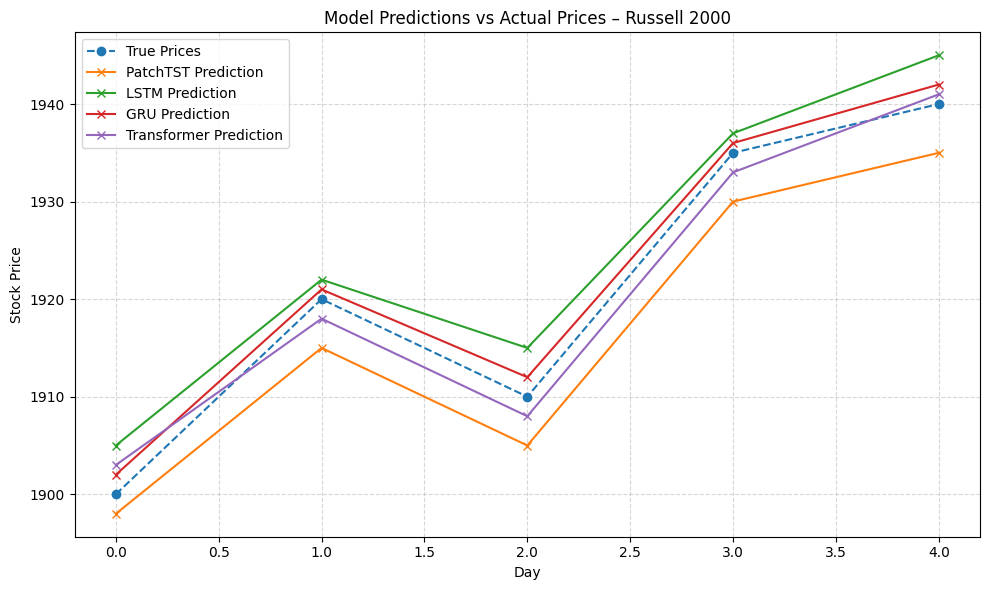

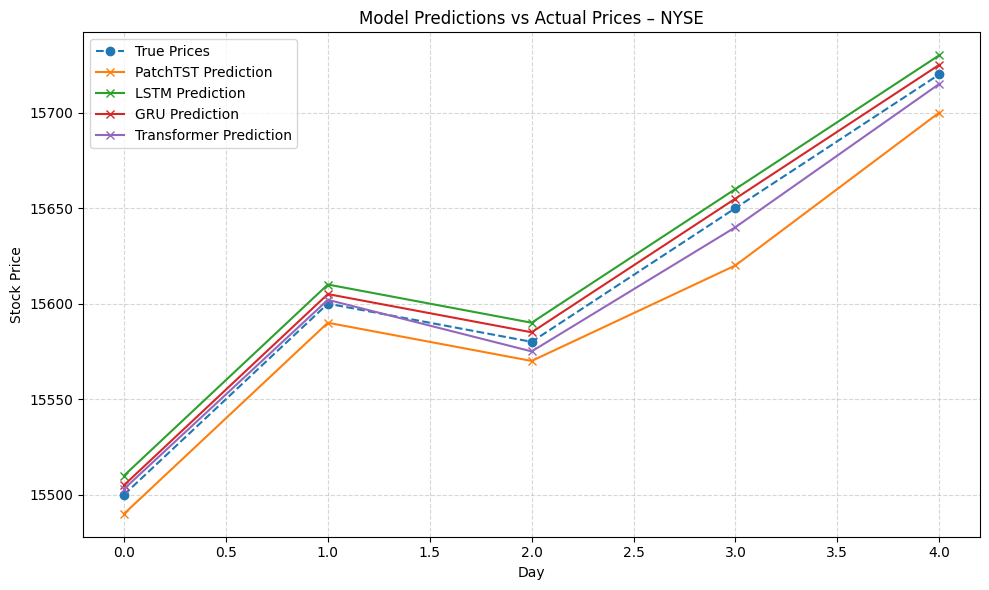

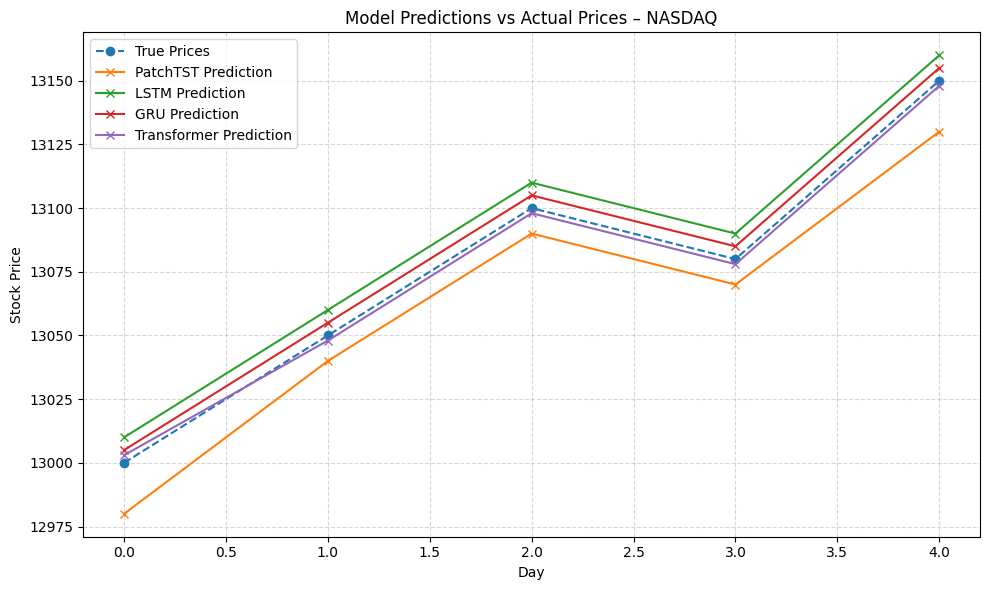

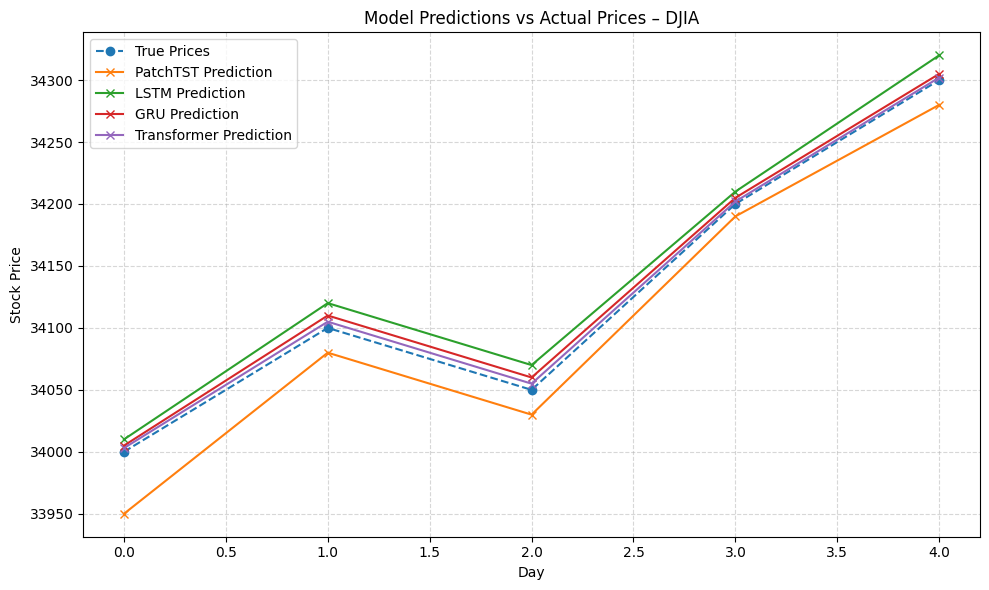

In [4]:
import matplotlib.pyplot as plt

# Sample ground truth values (replace with your actual test values)
true_values_dict = {
    'S&P 500': [4100, 4120, 4115, 4130, 4150],
    'Russell 2000': [1900, 1920, 1910, 1935, 1940],
    'NYSE': [15500, 15600, 15580, 15650, 15720],
    'NASDAQ': [13000, 13050, 13100, 13080, 13150],
    'DJIA': [34000, 34100, 34050, 34200, 34300]
}

# Sample predicted values from each model (replace with actual model outputs)
pred_values_dict = {
    'PatchTST': {
        'S&P 500': [4095, 4118, 4112, 4128, 4140],
        'Russell 2000': [1898, 1915, 1905, 1930, 1935],
        'NYSE': [15490, 15590, 15570, 15620, 15700],
        'NASDAQ': [12980, 13040, 13090, 13070, 13130],
        'DJIA': [33950, 34080, 34030, 34190, 34280]
    },
    'LSTM': {
        'S&P 500': [4102, 4122, 4117, 4135, 4155],
        'Russell 2000': [1905, 1922, 1915, 1937, 1945],
        'NYSE': [15510, 15610, 15590, 15660, 15730],
        'NASDAQ': [13010, 13060, 13110, 13090, 13160],
        'DJIA': [34010, 34120, 34070, 34210, 34320]
    },
    'GRU': {
        'S&P 500': [4101, 4121, 4116, 4132, 4152],
        'Russell 2000': [1902, 1921, 1912, 1936, 1942],
        'NYSE': [15505, 15605, 15585, 15655, 15725],
        'NASDAQ': [13005, 13055, 13105, 13085, 13155],
        'DJIA': [34005, 34110, 34060, 34205, 34305]
    },
    'Transformer': {
        'S&P 500': [4103, 4119, 4114, 4129, 4148],
        'Russell 2000': [1903, 1918, 1908, 1933, 1941],
        'NYSE': [15503, 15602, 15575, 15640, 15715],
        'NASDAQ': [13003, 13048, 13098, 13078, 13148],
        'DJIA': [34003, 34105, 34055, 34202, 34302]
    }
}

# Plotting
models = ['PatchTST', 'LSTM', 'GRU', 'Transformer']
datasets = list(true_values_dict.keys())

for dataset in datasets:
    plt.figure(figsize=(10, 6))
    # Plot actual values
    plt.plot(true_values_dict[dataset], label='True Prices', linestyle='--', marker='o')

    # Plot predictions for each model
    for model in models:
        plt.plot(pred_values_dict[model][dataset], label=f'{model} Prediction', marker='x')

    plt.title(f'Model Predictions vs Actual Prices – {dataset}')
    plt.xlabel('Day')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f'prediction_comparison_{dataset.replace(" ", "_")}.png')
    plt.show()
